In [5]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#read in the csv file as a dataframe called df
df=pd.read_csv('911.csv')

In [8]:
#CHECK THE INFO OF THE DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [9]:
#check the head of the df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [301]:
#the top 5 zipcodes for 911 calls
df['zip'].value_counts()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
77316.0        1
19134.0        1
19135.0        1
8502.0         1
18938.0        1
Name: zip, Length: 204, dtype: int64

In [302]:
#the 5 townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [11]:
len(df['title'].unique())


148

In [12]:
df['title'].nunique()

148

In [13]:
#creating new features
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [305]:
x=df['title'].iloc[0]

#put it in a list and split it

In [306]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [307]:
x.split(':')[0]

'EMS'

In [308]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [309]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [310]:
#The most common Reason for a 911 called based off ina new column
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

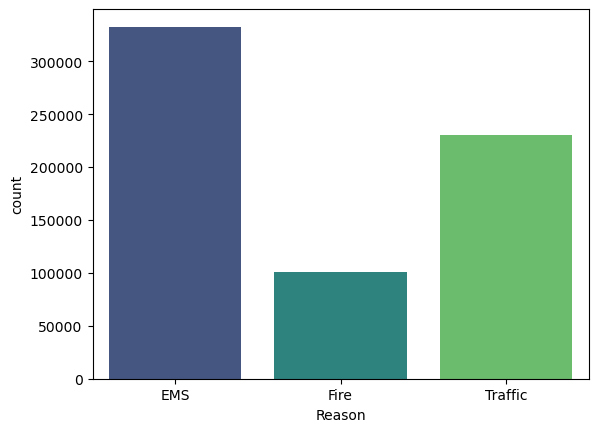

In [311]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [312]:
#Time information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [314]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [315]:
#The data type
type(df['timeStamp'].iloc[0])

str

In [271]:
#How to convert datatype column from strings to Datatime object

In [316]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [317]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [318]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [319]:
x=df['timeStamp'][0]

In [320]:
x

Timestamp('2015-12-10 17:10:52')

In [321]:
time.hour

17

In [322]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)

In [323]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [324]:
df['Month']=df['timeStamp'].apply(lambda time: time.month)

In [325]:
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: Month, Length: 663522, dtype: int64

In [340]:
df['DayofWeek']=df['timeStamp'].apply(lambda time: time.day_of_week)

In [341]:
df['DayofWeek']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: DayofWeek, Length: 663522, dtype: int64

In [339]:
df['Year']=df['timeStamp'].apply(lambda time: time.year)

In [329]:
df['Year']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
663517    2020
663518    2020
663519    2020
663520    2020
663521    2020
Name: Year, Length: 663522, dtype: int64

In [330]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015


In [331]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [332]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [342]:
df['DayofWeek']=df['DayofWeek'].map(dmap)

In [343]:
df['DayofWeek']

0         Thur
1         Thur
2         Thur
3         Thur
4         Thur
          ... 
663517     Wed
663518     Wed
663519     Wed
663520     Wed
663521     Wed
Name: DayofWeek, Length: 663522, dtype: object

In [344]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015


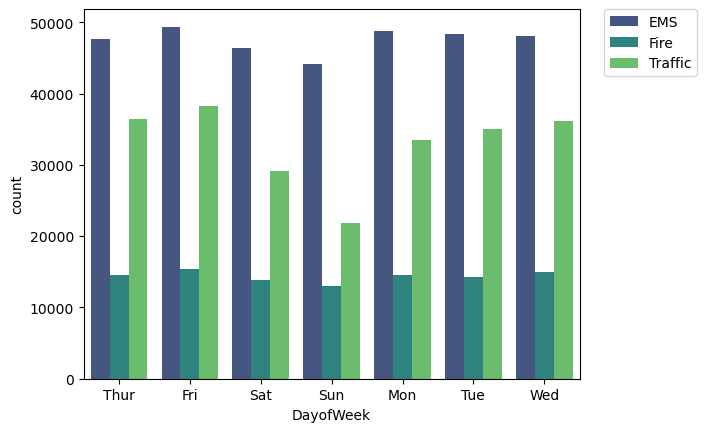

In [353]:
sns.countplot(x='DayofWeek',data=df,hue='Reason',palette='viridis')

#to relocate the legand
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

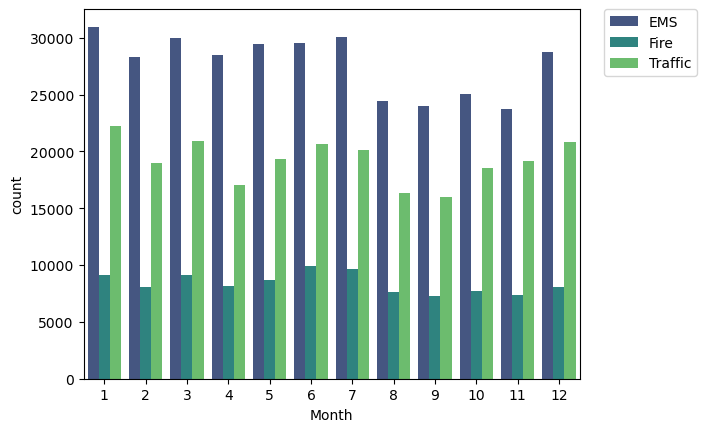

In [367]:
sns.countplot(x='Month',data=df,hue='Reason', palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

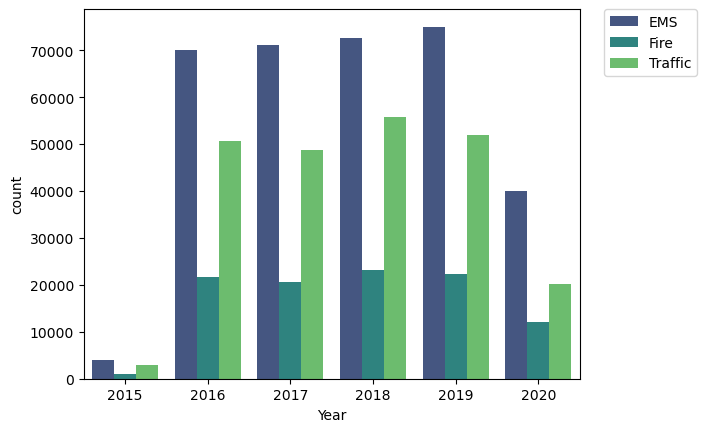

In [361]:
sns.countplot(x='Year',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [362]:
#group by object create

In [363]:
byMonth=df.groupby('Month').count()

In [364]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayofWeek,Year
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


<AxesSubplot:xlabel='Month'>

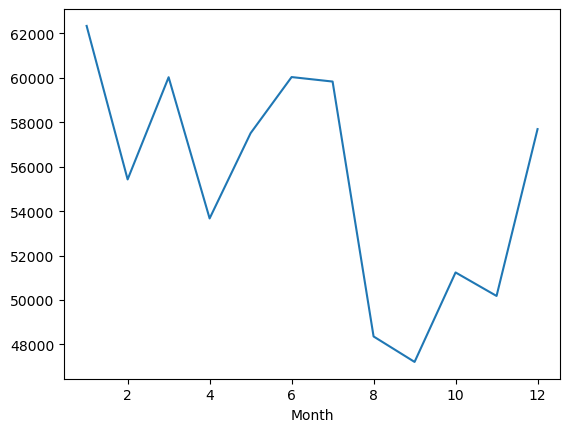

In [365]:
byMonth['lat'].plot()

In [369]:
#PART 2
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayofWeek,Year
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240,51240


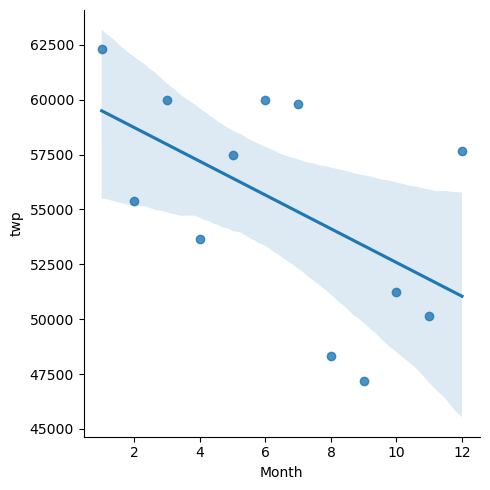

In [372]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [377]:
t=df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:10:52')

In [378]:
t.date()

datetime.date(2015, 12, 10)

In [379]:
#DATE COLUMN
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [385]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

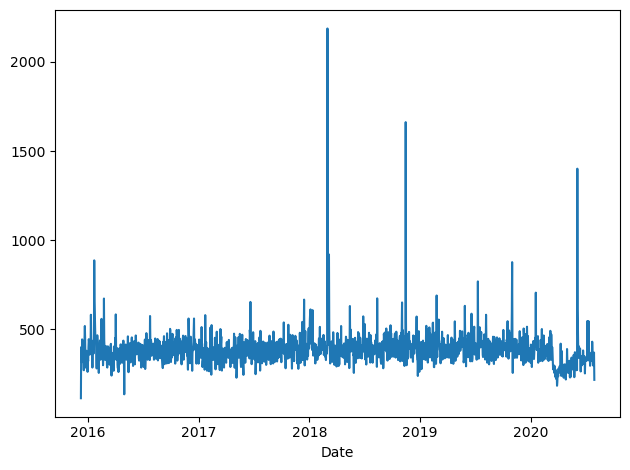

In [384]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

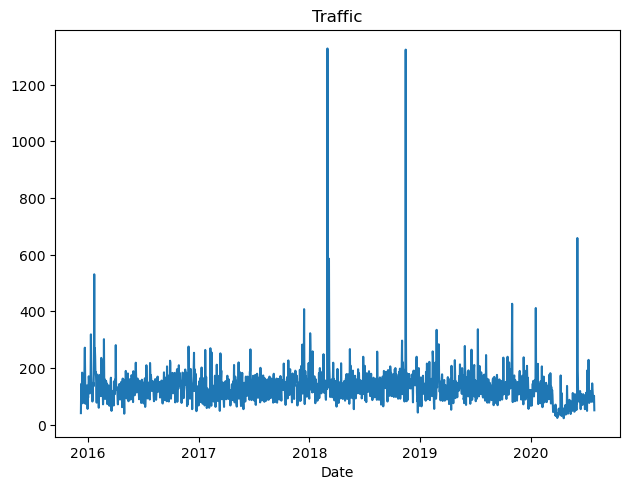

In [388]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

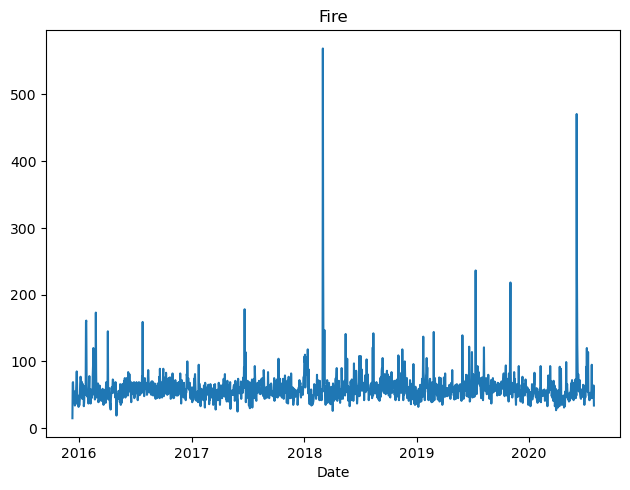

In [392]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

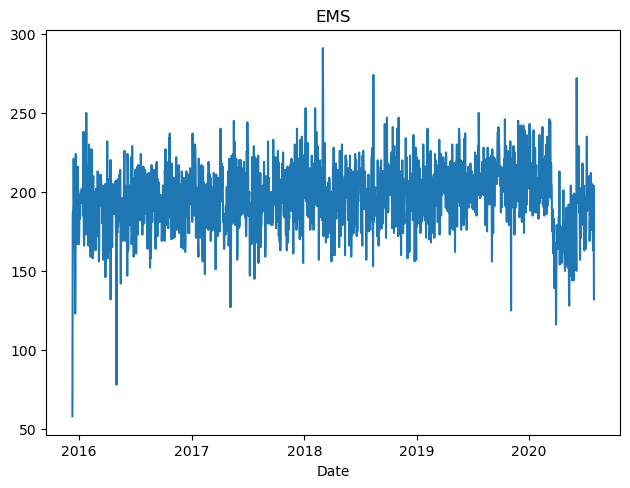

In [393]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

In [399]:
#HEATMAPS

dayhour=df.groupby(by=['DayofWeek','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='DayofWeek'>

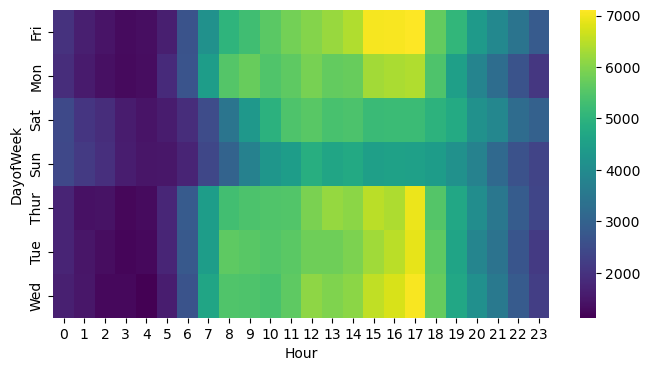

In [404]:
plt.figure(figsize=(8,4))
sns.heatmap(dayhour, cmap='viridis')

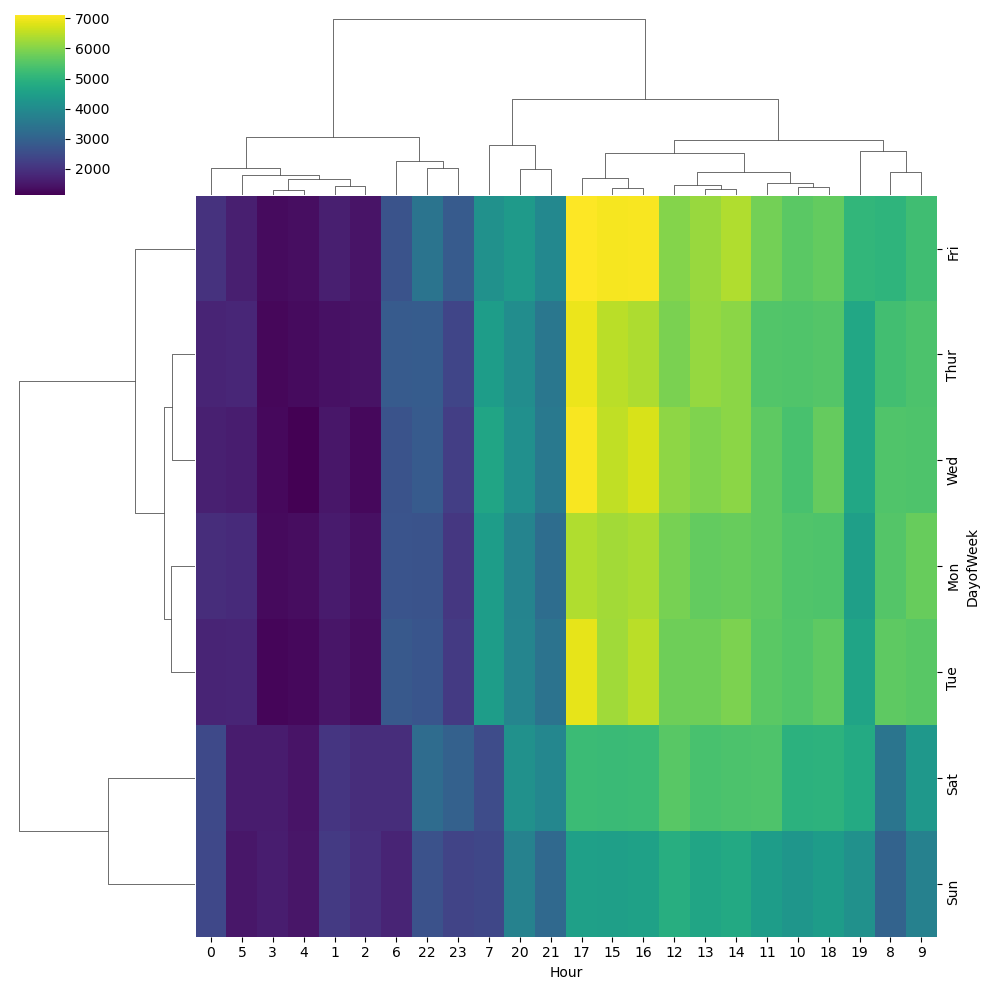

In [406]:
sns.clustermap(dayhour,cmap='viridis')

In [407]:
#HEATMAPS

daymonth=df.groupby(by=['DayofWeek','Month']).count()['Reason'].unstack()

In [408]:
daymonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayofWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thur,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<AxesSubplot:xlabel='Month', ylabel='DayofWeek'>

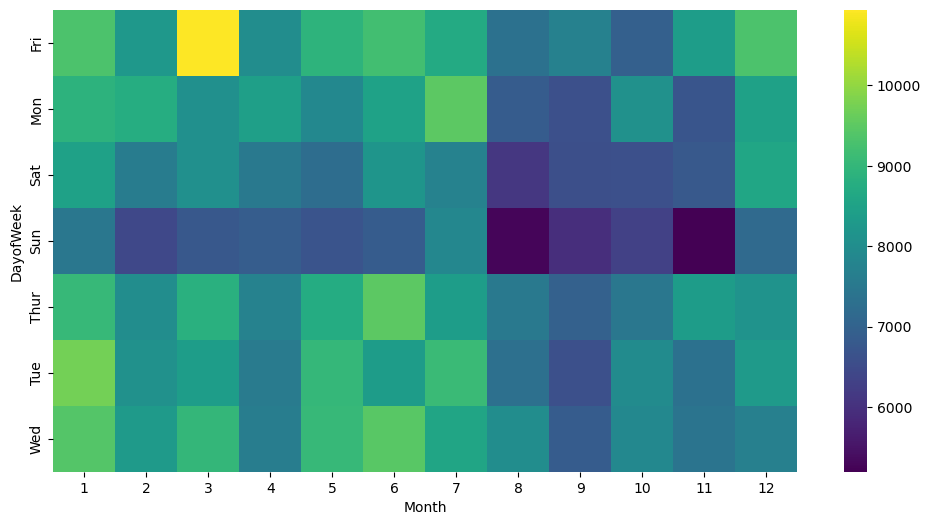

In [410]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth, cmap='viridis')

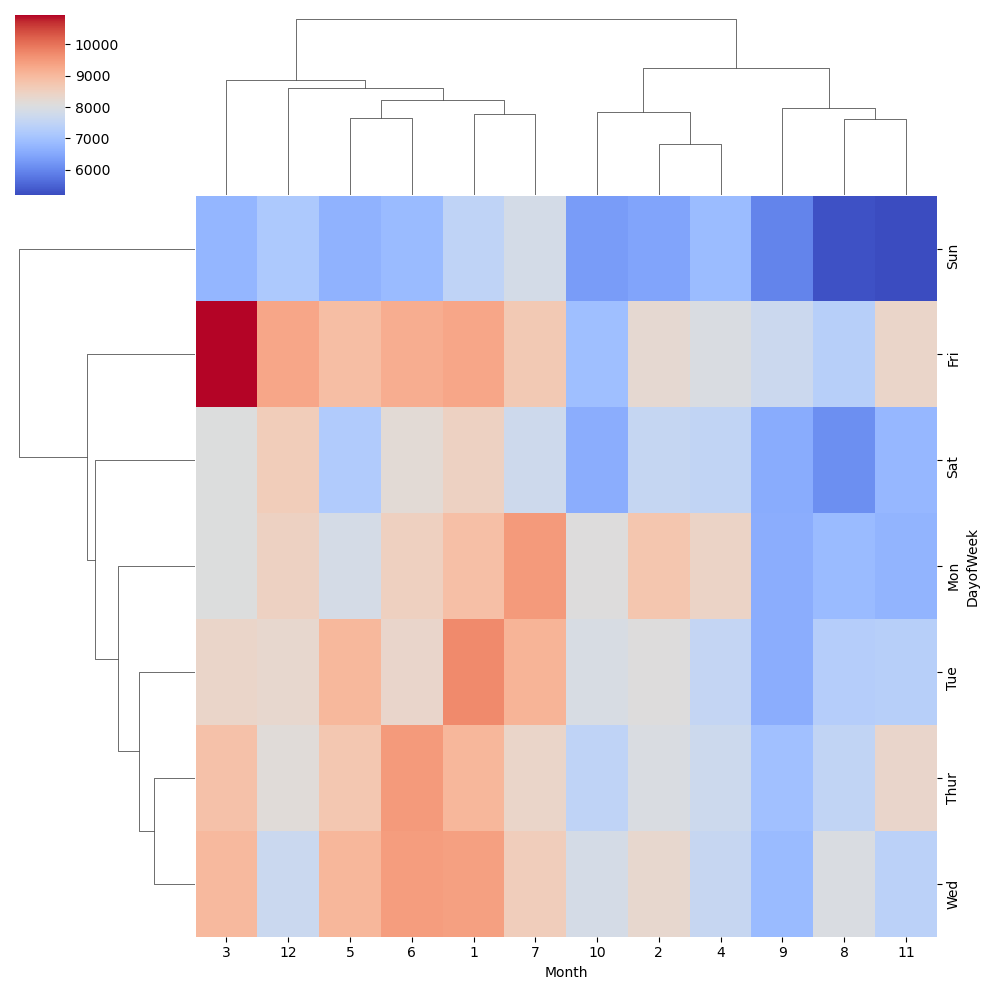

In [412]:
sns.clustermap(daymonth,cmap='coolwarm')